## ABC_data.zip の用意から

In [0]:
!pwd
!ls

/home/oshimamasara/PP


In [0]:
!git clone https://github.com/oshimamasara/ABC-DATA.git

Cloning into 'ABC-DATA'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
Checking connectivity... done.


In [0]:
%cd ABC-DATA

/home/oshimamasara/PP/ABC-DATA


In [0]:
import zipfile
with zipfile.ZipFile("ABC_data.zip","r") as zip_ref:
    zip_ref.extractall("DATA")

In [0]:
!rm -r ABC_data.zip

## ダウンロードした画像データの確認

+ 画像ファイル総数
+ ファイル形式
+ 中身の画像
+ 画像サイズ
+ 各アルファベット毎の画像枚数

In [0]:
from glob import glob 
check_files = glob('DATA/**/*.png')
print(check_files[0:5])
print(len(check_files))

['DATA/N/4E_00366_5.png', 'DATA/N/4E_00391_1.png', 'DATA/N/4E_00164_0.png', 'DATA/N/4E_00288_5.png', 'DATA/N/4e_00074_6.png']
81463


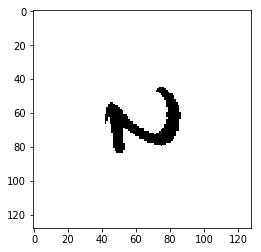

In [0]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img_sample  = "DATA/N/4E_00366_5.png"
img = Image.open(img_sample)
plt.imshow(img)

In [0]:
width, height = img.size
print("ファイル名：" + img_sample + "　幅：" + str(width) + "　高さ：" + str(height))

ファイル名：DATA/N/4E_00366_5.png　幅：128　高さ：128


In [0]:
import os
# ABC....Z の配列作成　new_dir_list 作成
new_dir_list = [] 
new_dir_list_name = 'A'
for i in range(0, 26): 
    new_dir_list.append(new_dir_list_name) 
    new_dir_list_name = chr(ord(new_dir_list_name) + 1)   
print(new_dir_list)

# 各ABC毎のファイル数確認
count = 0
files_total = 0

for i in new_dir_list:
  for path, dirs, files in os.walk("DATA/" + i):
    files=sorted(files)
    print(str(count) + "回目 : " + str(i) + " : " + str(len(files)))
    files_total = len(files) + files_total
  count = count + 1

print(files_total)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
0回目 : A : 3033
1回目 : B : 3026
2回目 : C : 3344
3回目 : D : 3020
4回目 : E : 2892
5回目 : F : 3053
6回目 : G : 2964
7回目 : H : 2925
8回目 : I : 4490
9回目 : J : 2958
10回目 : K : 2850
11回目 : L : 3375
12回目 : M : 3077
13回目 : N : 3128
14回目 : O : 3176
15回目 : P : 3127
16回目 : Q : 3018
17回目 : R : 3061
18回目 : S : 3129
19回目 : T : 2981
20回目 : U : 3143
21回目 : V : 3237
22回目 : W : 3122
23回目 : X : 3203
24回目 : Y : 2966
25回目 : Z : 3165
81463


## 画像ファイルのデータセット train/ 作成

In [0]:
!mkdir train

In [0]:
import shutil 

count = 0
for i in new_dir_list:
  files = glob("DATA/" + i + "/*.png")
  files = sorted(files)
  paste = "train/"
  for f in files:
      shutil.copy2(f, paste)

In [29]:
!find train -type f | wc -l

81463


In [24]:
check_pngs = glob('train/*.png')
print(len(check_pngs))

81463


In [23]:
!ls train | head -5

41_00000_0.png
41_00000_1.png
41_00000_2.png
41_00000_3.png
41_00000_4.png
ls: 書き込みエラー: Broken pipe


## CNN train/ 用 CSVファイルの作成

In [0]:
!touch train.csv

In [0]:
import os, csv, time

label = 0
count = 0

f=open('train.csv','r+')
w=csv.writer(f)

In [36]:
for i in new_dir_list:
  for path, dirs, files in os.walk("DATA/" + i):
    files=sorted(files)
    for filename in files:
      refilename = filename[:-4]
      print(filename)
      w.writerow([refilename,label])
      count = count + 1
    label = label + 1

print(count)

41_00000_0.png
41_00000_1.png
41_00000_2.png
41_00000_3.png
41_00000_4.png
41_00000_5.png
41_00000_6.png
41_00001_0.png
41_00001_1.png
41_00001_2.png
41_00001_3.png
41_00001_4.png
41_00001_5.png
41_00001_6.png
41_00002_0.png
41_00002_1.png
41_00002_2.png
41_00002_3.png
41_00002_4.png
41_00002_5.png
41_00002_6.png
41_00003_0.png
41_00003_1.png
41_00003_2.png
41_00003_3.png
41_00003_4.png
41_00003_5.png
41_00003_6.png
41_00004_0.png
41_00004_1.png
41_00004_2.png
41_00004_3.png
41_00004_4.png
41_00004_5.png
41_00004_6.png
41_00005_0.png
41_00005_1.png
41_00005_2.png
41_00005_3.png
41_00005_4.png
41_00005_5.png
41_00005_6.png
41_00006_0.png
41_00006_1.png
41_00006_2.png
41_00006_3.png
41_00006_4.png
41_00006_5.png
41_00006_6.png
41_00007_0.png
41_00007_1.png
41_00007_2.png
41_00007_3.png
41_00007_4.png
41_00007_5.png
41_00007_6.png
41_00008_0.png
41_00008_1.png
41_00008_2.png
41_00008_3.png
41_00008_4.png
41_00008_5.png
41_00008_6.png
41_00009_0.png
41_00009_1.png
41_00009_2.png
41_00009_3

In [37]:
file = open("train.csv")
numline = len(file.readlines())
print (numline)

print("ちゃんとコピペできた？　" + str(numline - count))

81425
ちゃんとコピペできた？　-38


## CSV足らずを追記

In [38]:
new_dir_list[25]

'Z'

In [0]:
f = open('train.csv','a')
w = csv.writer(f) 

In [40]:
count = 0
add_count = 0

for i in new_dir_list:
  for path, dirs, files in os.walk("DATA/" + i):
    files=sorted(files)
    for filename in files:
      count = count + 1

      if count >= 81426:
        refilename = filename[:-4]
        print(refilename)
        w.writerow([refilename,label])
        add_count = add_count + 1
      else:
        pass
    label = label + 1

print(add_count)

5a_00416_6
5a_00417_6
5a_00418_6
5a_00419_6
5a_00420_6
5a_00421_6
5a_00422_6
5a_00423_6
5a_00424_6
5a_00425_6
5a_00426_6
5a_00427_6
5a_00428_6
5a_00429_6
5a_00430_6
5a_00431_6
5a_00432_6
5a_00433_6
5a_00434_6
5a_00435_6
5a_00436_6
5a_00437_6
5a_00438_6
5a_00439_6
5a_00440_6
5a_00441_6
5a_00442_6
5a_00443_6
5a_00444_6
5a_00445_6
5a_00446_6
5a_00447_6
5a_00448_6
5a_00449_6
5a_00450_6
5a_00451_6
5a_00452_6
5a_00453_6
38


### CSVファイルチェック

In [41]:
file = open("train.csv")
numline = len(file.readlines())
print (numline)

81463
